In [ ]:
pip install pandas numpy matplotlib seaborn requests

In [ ]:
import requests
import pandas as pd

# Fetch current quiz data
current_quiz_url = "https://api.jsonserve.com/rJvd7g"
current_quiz_response = requests.get(current_quiz_url)
current_quiz_data = current_quiz_response.json()

# Fetch historical quiz data
historical_quiz_url = "https://api.jsonserve.com/XgAgFJ"
historical_quiz_response = requests.get(historical_quiz_url)
historical_quiz_data = historical_quiz_response.json()

# Print the raw JSON data to inspect its structure
print("Current Quiz Data (Raw JSON):")
print(current_quiz_data)

print("\nHistorical Quiz Data (Raw JSON):")
print(historical_quiz_data)

Current Quiz Data (Raw JSON):
{'id': 336566, 'quiz_id': 43, 'user_id': '7ZXdz3zHuNcdg9agb5YpaOGLQqw2', 'submitted_at': '2025-01-17T15:51:29.859+05:30', 'created_at': '2025-01-17T15:51:29.871+05:30', 'updated_at': '2025-01-17T15:51:29.871+05:30', 'score': 32, 'trophy_level': 2, 'accuracy': '80 %', 'speed': '100', 'final_score': '30.0', 'negative_score': '2.0', 'correct_answers': 8, 'incorrect_answers': 2, 'source': 'live', 'type': 'topic', 'started_at': '2025-01-17T16:20:44.000+05:30', 'ended_at': '2025-01-17T16:21:28.000+05:30', 'duration': '15:00', 'better_than': 24, 'total_questions': 128, 'rank_text': 'Topic Rank - #2402', 'mistakes_corrected': 6, 'initial_mistake_count': 8, 'response_map': {'1837': 7363, '1848': 7407, '1852': 7423, '1862': 7464, '1877': 7525, '1878': 7529, '1900': 7617, '1917': 7685, '1934': 7750, '1964': 7872}, 'quiz': {'id': 43, 'name': None, 'title': 'Structural Organisation in Animals and Plants (7)', 'description': '', 'difficulty_level': None, 'topic': 'Struc

In [ ]:
import pandas as pd

# Normalize current quiz data
current_quiz_df = pd.json_normalize(current_quiz_data, sep='_')

# Normalize historical quiz data
historical_quiz_df = pd.json_normalize(historical_quiz_data, sep='_')

# Print the column names to verify
print("Current Quiz Data Columns:")
print(current_quiz_df.columns)

print("\nHistorical Quiz Data Columns:")
print(historical_quiz_df.columns)

Current Quiz Data Columns:
Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'next_steps', 'response_map_1837',
       'response_map_1848', 'response_map_1852', 'response_map_1862',
       'response_map_1877', 'response_map_1878', 'response_map_1900',
       'response_map_1917', 'response_map_1934', 'response_map_1964',
       'quiz_name', 'quiz_title', 'quiz_description', 'quiz_difficulty_level',
       'quiz_topic', 'quiz_time', 'quiz_is_published', 'quiz_created_at',
       'quiz_updated_at', 'quiz_duration', 'quiz_end_time',
       'quiz_negative_marks', 'quiz_correct_answer_marks', 'quiz_shuffle',
       'quiz_show_answers', 'quiz_lock_solutions', 'quiz_

In [ ]:
# Print the first few rows of the current quiz data
print("Current Quiz Data:")
print(current_quiz_df.head())

# Print the first few rows of the historical quiz data
print("\nHistorical Quiz Data:")
print(historical_quiz_df.head())

Current Quiz Data:
       id  quiz_id                       user_id  \
0  336566       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   

                    submitted_at                     created_at  \
0  2025-01-17T15:51:29.859+05:30  2025-01-17T15:51:29.871+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:51:29.871+05:30     32             2     80 %   100  ...   

  quiz_exam_id quiz_show_unanswered  quiz_ends_at  quiz_lives quiz_live_count  \
0         None                False    2025-01-18        None       Free Test   

  quiz_coin_count quiz_questions_count   quiz_daily_date  \
0              -1                  128  January 17, 2025   

  quiz_max_mistake_count  quiz_reading_materials  
0                     15                      []  

[1 rows x 67 columns]

Historical Quiz Data:
       id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42  

In [ ]:
# Calculate accuracy for each quiz in historical data
historical_quiz_df['accuracy'] = historical_quiz_df['correct_answers'] / historical_quiz_df['total_questions']

# Group by topic and calculate average accuracy
performance_by_topic = historical_quiz_df.groupby('quiz_topic')['accuracy'].mean().reset_index()

print("\nPerformance by Topic:")
print(performance_by_topic)


Performance by Topic:
                                 quiz_topic  accuracy
0               Body Fluids and Circulation  0.216667
1              Body Fluids and Circulation   0.594203
2                        Human Reproduction  0.112360
3                       Reproductive Health  0.236364
4              Respiration and Gas Exchange  0.060000
5                 human health and disease   0.682927
6                 microbes in human welfare  0.950000
7  principles of inheritance and variation   0.050847
8                      reproductive health   0.590909


In [ ]:
# Group by difficulty level and calculate average accuracy
performance_by_difficulty = historical_quiz_df.groupby('quiz_difficulty_level')['accuracy'].mean().reset_index()

print("\nPerformance by Difficulty Level:")
print(performance_by_difficulty)


Performance by Difficulty Level:
Empty DataFrame
Columns: [quiz_difficulty_level, accuracy]
Index: []


In [ ]:
# Define a threshold for weak areas (e.g., accuracy < 50%)
weak_topics = performance_by_topic[performance_by_topic['accuracy'] < 0.5]
weak_difficulty = performance_by_difficulty[performance_by_difficulty['accuracy'] < 0.5]

print("\nWeak Topics (Accuracy < 50%):")
print(weak_topics)

print("\nWeak Difficulty Levels (Accuracy < 50%):")
print(weak_difficulty)


Weak Topics (Accuracy < 50%):
                                 quiz_topic  accuracy
0               Body Fluids and Circulation  0.216667
2                        Human Reproduction  0.112360
3                       Reproductive Health  0.236364
4              Respiration and Gas Exchange  0.060000
7  principles of inheritance and variation   0.050847

Weak Difficulty Levels (Accuracy < 50%):
Empty DataFrame
Columns: [quiz_difficulty_level, accuracy]
Index: []


In [ ]:
# Clean topic names by stripping whitespace and converting to lowercase
performance_by_topic['quiz_topic'] = performance_by_topic['quiz_topic'].str.strip().str.lower()
historical_quiz_df['quiz_topic'] = historical_quiz_df['quiz_topic'].str.strip().str.lower()

# Recalculate performance by topic after cleaning
performance_by_topic = historical_quiz_df.groupby('quiz_topic').agg(
    accuracy=('accuracy', 'mean'),  # Average accuracy
    total_questions=('total_questions', 'sum'),  # Total questions attempted
    correct_answers=('correct_answers', 'sum'),  # Total correct answers
    incorrect_answers=('incorrect_answers', 'sum')  # Total incorrect answers
).reset_index()

# Define a dynamic threshold for weak areas (e.g., accuracy < 60%)
threshold = 0.6  # Adjust this value as needed
weak_topics = performance_by_topic[performance_by_topic['accuracy'] < threshold]

# Sort weak topics by accuracy (lowest accuracy first)
weak_topics_sorted = weak_topics.sort_values(by='accuracy', ascending=True)

# Generate detailed recommendations
print("\nDetailed Recommendations for Weak Topics (Accuracy < {}%):".format(int(threshold * 100)))
for index, row in weak_topics_sorted.iterrows():
    print(f"""
    Topic: {row['quiz_topic'].title()}
    - Accuracy: {row['accuracy'] * 100:.2f}%
    - Total Questions Attempted: {row['total_questions']}
    - Correct Answers: {row['correct_answers']}
    - Incorrect Answers: {row['incorrect_answers']}
    Recommendation: Focus on this topic as your accuracy is below the threshold.
    Practice more questions and review the concepts to improve.
    """)


Detailed Recommendations for Weak Topics (Accuracy < 60%):

    Topic: Principles Of Inheritance And Variation
    - Accuracy: 5.08%
    - Total Questions Attempted: 59
    - Correct Answers: 3
    - Incorrect Answers: 7
    Recommendation: Focus on this topic as your accuracy is below the threshold. 
    Practice more questions and review the concepts to improve.
    

    Topic: Respiration And Gas Exchange
    - Accuracy: 6.00%
    - Total Questions Attempted: 100
    - Correct Answers: 6
    - Incorrect Answers: 3
    Recommendation: Focus on this topic as your accuracy is below the threshold. 
    Practice more questions and review the concepts to improve.
    

    Topic: Human Reproduction
    - Accuracy: 11.24%
    - Total Questions Attempted: 89
    - Correct Answers: 10
    - Incorrect Answers: 16
    Recommendation: Focus on this topic as your accuracy is below the threshold. 
    Practice more questions and review the concepts to improve.
    

    Topic: Body Fluids And C

In [ ]:
# Clean the 'speed' column by converting it to numeric (ignore errors for non-numeric values)
historical_quiz_df['speed'] = pd.to_numeric(historical_quiz_df['speed'], errors='coerce')

# Drop rows with NaN values in 'speed' (if any)
historical_quiz_df = historical_quiz_df.dropna(subset=['speed'])

# Calculate monthly trends for accuracy and speed
historical_quiz_df['quiz_date'] = pd.to_datetime(historical_quiz_df['submitted_at'])
historical_quiz_df['month'] = historical_quiz_df['quiz_date'].dt.month
monthly_trends = historical_quiz_df.groupby('month').agg(
    accuracy=('accuracy', 'mean'),  # Average accuracy
    speed=('speed', 'mean')         # Average speed
).reset_index()

# Define accuracy trend
if monthly_trends['accuracy'].iloc[-1] > monthly_trends['accuracy'].iloc[0]:
    accuracy_trend = "Improving"
elif monthly_trends['accuracy'].iloc[-1] < monthly_trends['accuracy'].iloc[0]:
    accuracy_trend = "Declining"
else:
    accuracy_trend = "Consistent"

# Define speed trend
if monthly_trends['speed'].iloc[-1] > monthly_trends['speed'].iloc[0]:
    speed_trend = "Improving"
elif monthly_trends['speed'].iloc[-1] < monthly_trends['speed'].iloc[0]:
    speed_trend = "Declining"
else:
    speed_trend = "Consistent"

# Identify weak areas (topics with accuracy < 60%)
weak_topics = performance_by_topic[performance_by_topic['accuracy'] < 0.6]

# Identify strengths (topics with accuracy > 80%)
strong_topics = performance_by_topic[performance_by_topic['accuracy'] > 0.8]

# Calculate consistency (standard deviation of accuracy)
consistency = historical_quiz_df['accuracy'].std()

# Define persona based on analysis
if accuracy_trend == "Improving" and speed_trend == "Improving":
    persona = "High Achiever"
elif accuracy_trend == "Improving" and speed_trend == "Declining":
    persona = "Focused Learner"
elif accuracy_trend == "Declining" and speed_trend == "Improving":
    persona = "Rushed Learner"
elif accuracy_trend == "Declining" and speed_trend == "Declining":
    persona = "Struggling Learner"
else:
    persona = "Balanced Learner"

# Print detailed student persona
print("\nComprehensive Student Persona:")
print(f"""
    Accuracy Trend: {accuracy_trend}
    Speed Trend: {speed_trend}
    Weak Areas: {weak_topics['quiz_topic'].tolist()}
    Strengths: {strong_topics['quiz_topic'].tolist()}
    Consistency: {consistency:.2f} (Lower is better)
    Persona: {persona}
""")

# Additional Insights
print("\nAdditional Insights:")
print(f"""
    1. The student's accuracy is {accuracy_trend.lower()}, and their speed is {speed_trend.lower()}.
    2. The student struggles with the following topics: {', '.join(weak_topics['quiz_topic'].tolist())}.
    3. The student excels in the following topics: {', '.join(strong_topics['quiz_topic'].tolist())}.
    4. The student's performance consistency is {consistency:.2f}, which indicates {'high' if consistency < 0.1 else 'moderate' if consistency < 0.2 else 'low'} consistency.
    5. Based on the analysis, the student is a {persona}.
""")


Comprehensive Student Persona:

    Accuracy Trend: Declining
    Speed Trend: Declining
    Weak Areas: ['body fluids and circulation', 'human reproduction', 'principles of inheritance and variation', 'reproductive health', 'respiration and gas exchange']
    Strengths: ['microbes in human welfare']
    Consistency: 0.32 (Lower is better)
    Persona: Struggling Learner


Additional Insights:

    1. The student's accuracy is declining, and their speed is declining.
    2. The student struggles with the following topics: body fluids and circulation, human reproduction, principles of inheritance and variation, reproductive health, respiration and gas exchange.
    3. The student excels in the following topics: microbes in human welfare.
    4. The student's performance consistency is 0.32, which indicates low consistency.
    5. Based on the analysis, the student is a Struggling Learner.



<ipython-input-21-eff82eb2f2ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='accuracy', y='quiz_topic', data=weak_topics_sorted, palette='viridis')


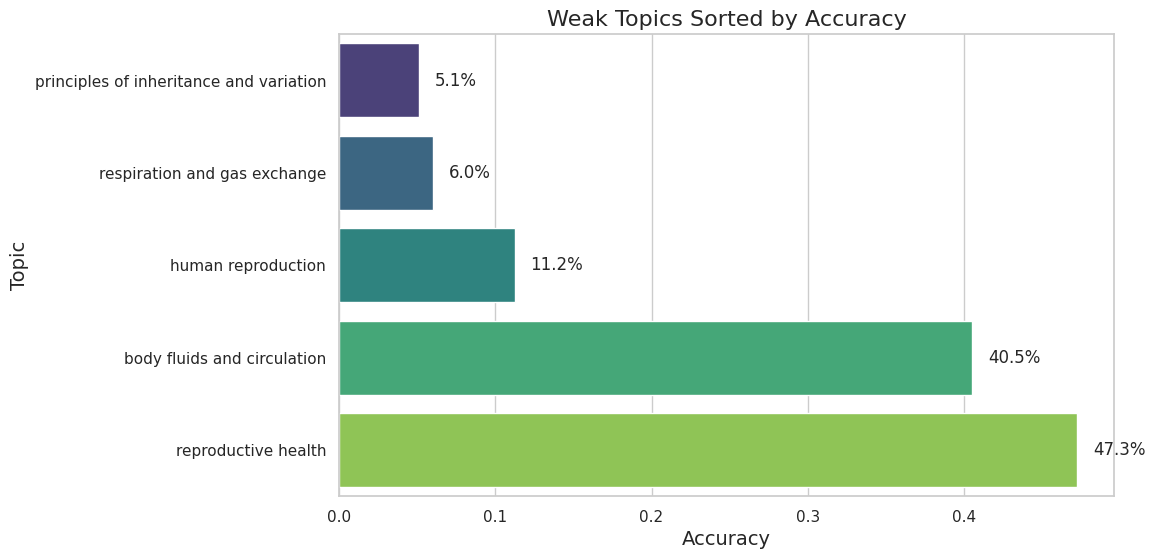

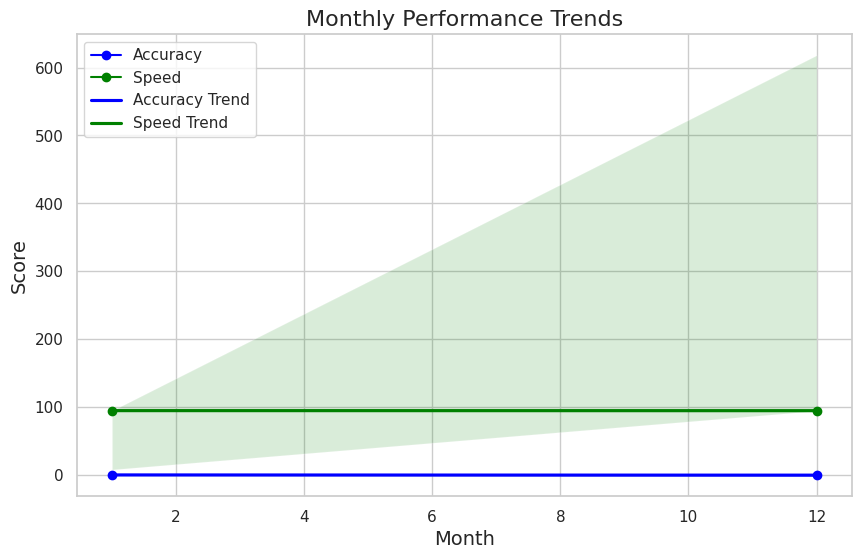

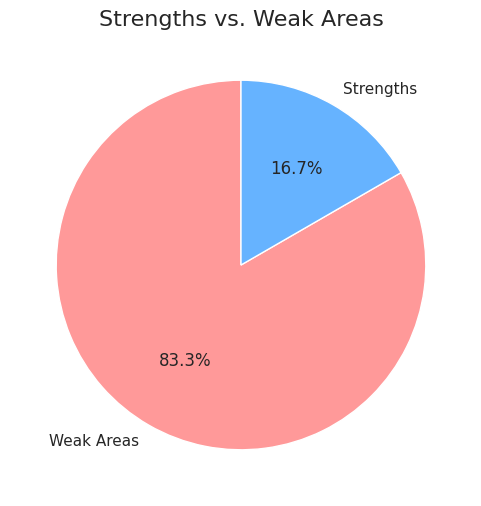

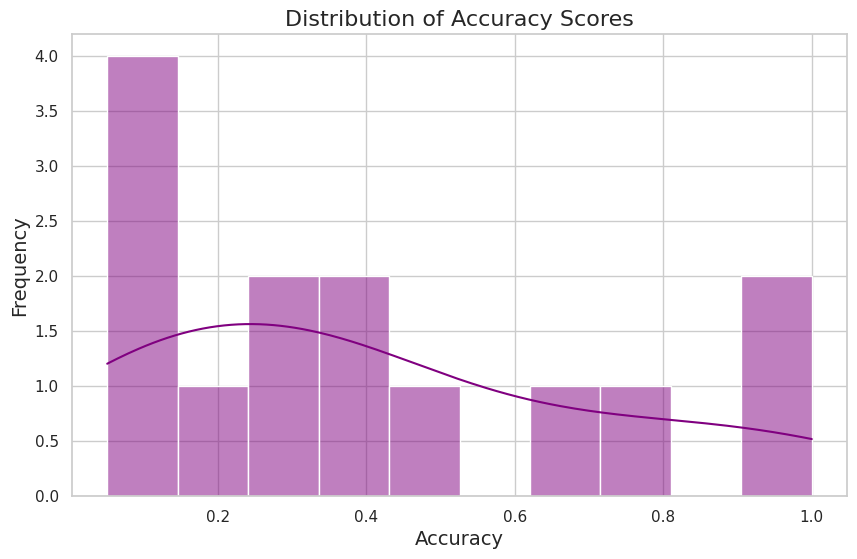

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# 1. Weak Topics Bar Plot
plt.figure(figsize=(10, 6))
weak_topics_sorted = weak_topics.sort_values(by='accuracy', ascending=True)
ax = sns.barplot(x='accuracy', y='quiz_topic', data=weak_topics_sorted, palette='viridis')

# Add annotations for accuracy percentages
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height() / 2, f'{width * 100:.1f}%', va='center')

plt.title("Weak Topics Sorted by Accuracy", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Topic", fontsize=14)
plt.show()

# 2. Monthly Trends Line Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['month'], monthly_trends['accuracy'], marker='o', label='Accuracy', color='blue')
plt.plot(monthly_trends['month'], monthly_trends['speed'], marker='o', label='Speed', color='green')

# Add trendlines
sns.regplot(x=monthly_trends['month'], y=monthly_trends['accuracy'], scatter=False, color='blue', label='Accuracy Trend')
sns.regplot(x=monthly_trends['month'], y=monthly_trends['speed'], scatter=False, color='green', label='Speed Trend')

plt.title("Monthly Performance Trends", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend()
plt.show()

# 3. Strengths vs. Weak Areas Pie Chart
labels = ['Weak Areas', 'Strengths']
sizes = [len(weak_topics), len(strong_topics)]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Strengths vs. Weak Areas", fontsize=16)
plt.show()

# 4. Consistency Histogram
plt.figure(figsize=(10, 6))
sns.histplot(historical_quiz_df['accuracy'], bins=10, kde=True, color='purple')
plt.title("Distribution of Accuracy Scores", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

<ipython-input-22-d93e129ef57d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='accuracy', y='quiz_topic', data=weak_topics_sorted, palette='viridis')


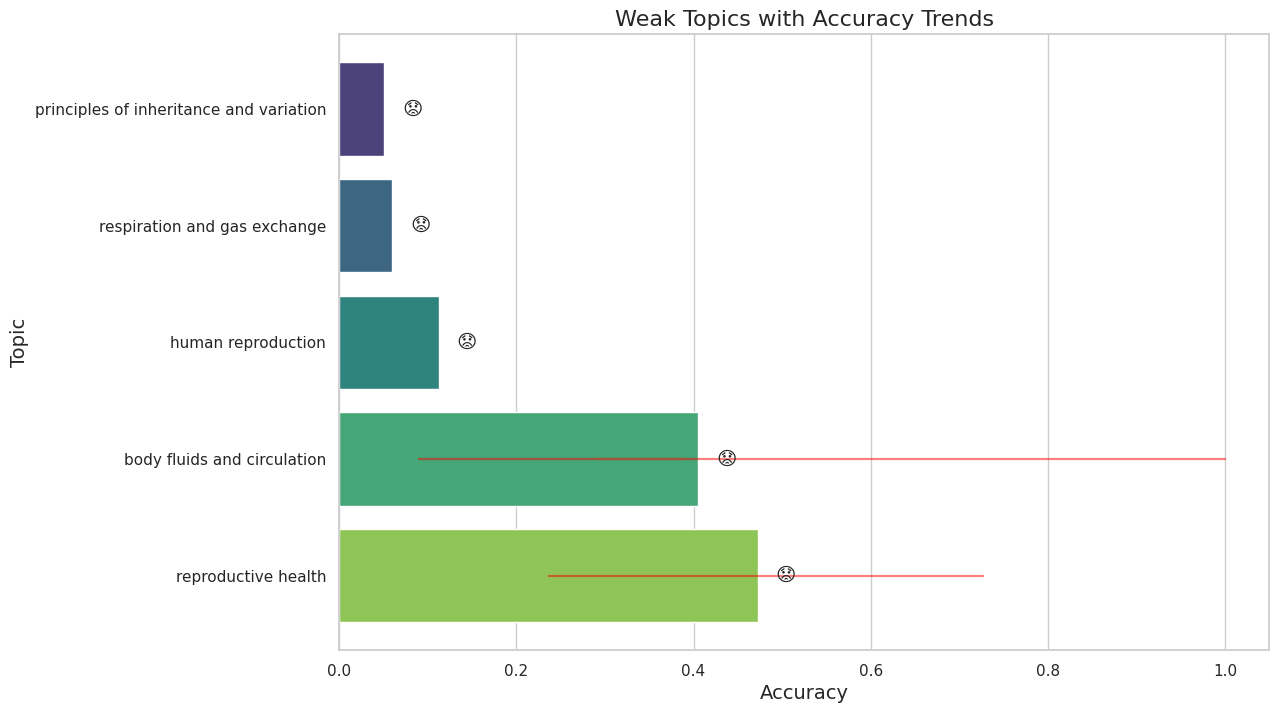

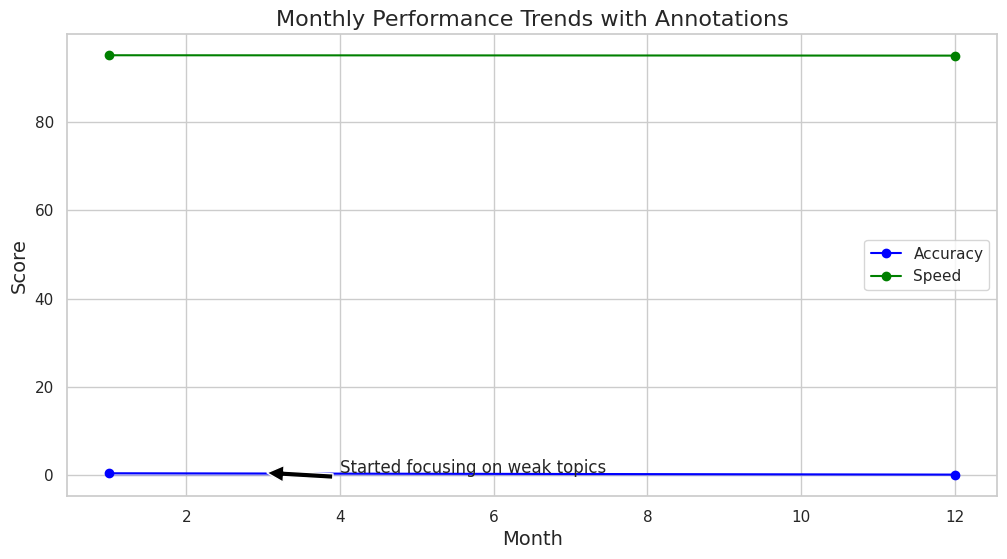

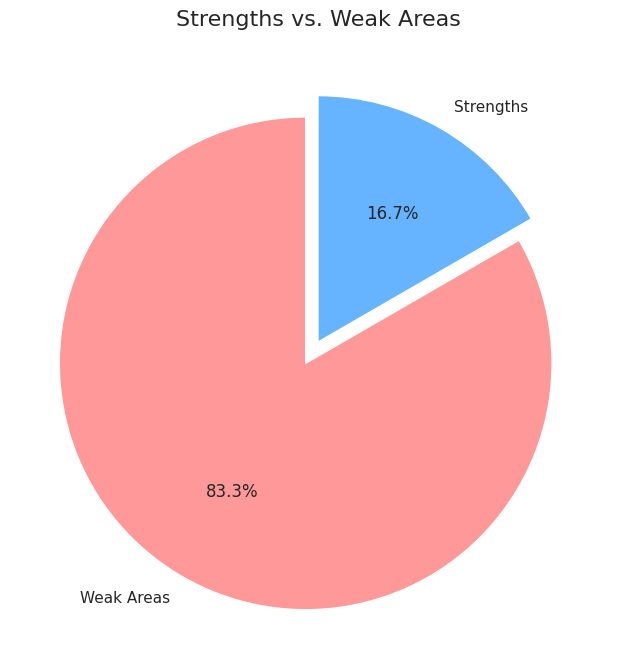

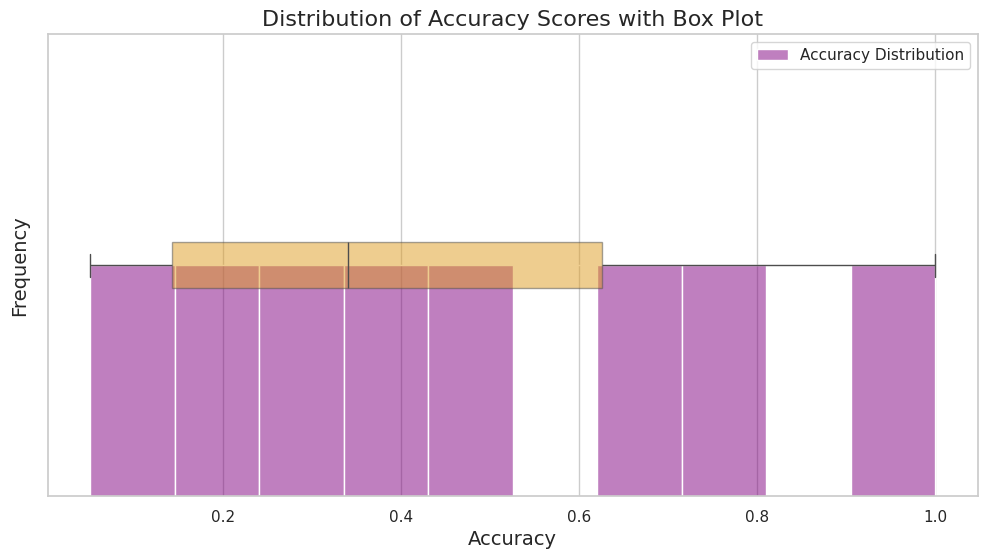

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for plots
sns.set(style="whitegrid")

# 1. Weak Topics Bar Plot with Sparklines
plt.figure(figsize=(12, 8))
weak_topics_sorted = weak_topics.sort_values(by='accuracy', ascending=True)
ax = sns.barplot(x='accuracy', y='quiz_topic', data=weak_topics_sorted, palette='viridis')

# Add sparklines for each topic
for i, topic in enumerate(weak_topics_sorted['quiz_topic']):
    topic_data = historical_quiz_df[historical_quiz_df['quiz_topic'] == topic]
    sparkline = topic_data['accuracy'].values
    ax.plot(sparkline, np.ones_like(sparkline) * i, color='red', alpha=0.5)

# Add emoji icons for weak topics
for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2, '😟', fontsize=14, va='center')

plt.title("Weak Topics with Accuracy Trends", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Topic", fontsize=14)
plt.show()

# 2. Monthly Trends Line Plot with Annotations
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['month'], monthly_trends['accuracy'], marker='o', label='Accuracy', color='blue')
plt.plot(monthly_trends['month'], monthly_trends['speed'], marker='o', label='Speed', color='green')

# Add gradient shading for accuracy
plt.fill_between(monthly_trends['month'], monthly_trends['accuracy'], color='blue', alpha=0.1)

# Add annotations
plt.annotate('Started focusing on weak topics', xy=(3, 0.6), xytext=(4, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title("Monthly Performance Trends with Annotations", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend()
plt.show()

# 3. Strengths vs. Weak Areas Pie Chart with Exploding Slices
labels = ['Weak Areas', 'Strengths']
sizes = [len(weak_topics), len(strong_topics)]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the weak areas slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Strengths vs. Weak Areas", fontsize=16)
plt.show()

# 4. Consistency Histogram with Box Plot
plt.figure(figsize=(12, 6))
sns.histplot(historical_quiz_df['accuracy'], bins=10, kde=True, color='purple', label='Accuracy Distribution')
sns.boxplot(x=historical_quiz_df['accuracy'], color='orange', width=0.1, boxprops=dict(alpha=0.5))

plt.title("Distribution of Accuracy Scores with Box Plot", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.show()